Beta: [1.02880023 2.87703638]
Beta Std Error: [0.07798391 0.2286011 ]
Beta Covariance: [[ 0.06250511 -0.15781297]
 [-0.15781297  0.53710867]]
Residual Variance: 0.09729588510261855
Inverse Condition #: 0.01711697716975434
Reason(s) for Halting:
  Sum of squares convergence


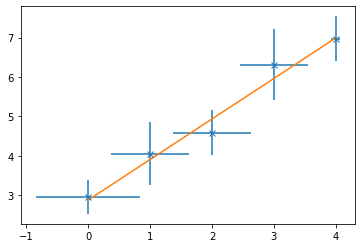

In [58]:
#https://docs.scipy.org/doc/scipy/reference/odr.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random

x = np.array([0, 1, 2, 3, 4, ])
y = np.array([i+3 + random.random() -0.5 for i in x])


x_err = np.array([random.random() for i in x])
y_err = np.array([random.random() for i in x])



def lin_func(B, x):
    [m,b]=B
    return m*x+b
lin_model = Model(lin_func)
data = RealData(x, y, sx=x_err, sy=y_err)
odr = ODR(data, lin_model, beta0=[1., 0.])
out = odr.run()
out.pprint()

x_fit = np.linspace(x[0], x[-1], 1000)
y_fit = lin_func(out.beta, x_fit)

plt.errorbar(x, y, xerr=x_err, yerr=y_err, linestyle='None', marker='x')
plt.plot(x_fit, y_fit)
